<a href="http://landlab.github.io"><img style="float: left" src="../../media/landlab_header.png"></a>

# The deAlmeida Overland Flow Component 

<hr>
<small>For more Landlab tutorials, click here: <a href="https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html">https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html</a></small>
<hr>

This notebook illustrates running the deAlmeida overland flow component in an extremely simple-minded way on a real topography, then shows it creating a flood sequence along an inclined surface with an oscillating water surface at one end.

First, import what we'll need:

In [133]:
from landlab.components.overland_flow import OverlandFlow
from landlab.plot.imshow import imshow_grid
from landlab.plot.colors import water_colormap
from landlab import RasterModelGrid
from landlab.io.esri_ascii import read_esri_ascii
from landlab.plot.graph import plot_graph
from landlab.plot.graph import plot_nodes
from matplotlib.pyplot import figure
import numpy as np
from time import time
%matplotlib inline

Pick the initial and run conditions

In [134]:
run_time = 100  # duration of run, (s)
h_init = 0.1  # initial thin layer of water (m)
n = 0.01  # roughness coefficient, (s/m^(1/3))
g = 9.8  # gravity (m/s^2)
alpha = 0.7  # time-step factor (nondimensional; from Bates et al., 2010)
u = 0.4  # constant velocity (m/s, de Almeida et al., 2012)
run_time_slices = (10, 50, 100)

Elapsed time starts at 1 second. This prevents errors when setting our boundary conditions.

In [135]:
elapsed_time = 1.0

#### Import hugo_site.asc dem

In [136]:
gm,z = read_esri_ascii("espin/lessons/landlab/hugo_site.asc", name='topographic__elevation')

In [137]:
# Indicates that a boundary node is closed
gm.status_at_node[z<0.0] = gm.BC_NODE_IS_CLOSED

Use Landlab methods to import an ARC ascii grid, and load the data into the field that the component needs to look at to get the data. This loads the elevation data, z, into a "field" in the grid itself, defined on the nodes.

We can get at this data with this syntax:

In [138]:
np.all(gm.at_node['topographic__elevation'] == z)

True

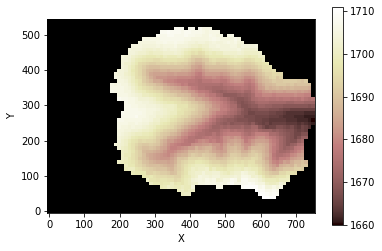

In [139]:
# check DEM
imshow_grid(gm, 'topographic__elevation')

In [140]:
my_outlet_node = 100  # This DEM was generated using Landlab and the outlet node ID was known
gm.status_at_node[my_outlet_node] = gm.BC_NODE_IS_FIXED_VALUE

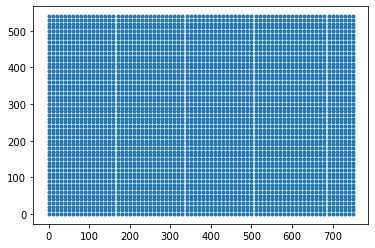

In [141]:
import matplotlib.pyplot as plt
plt.plot(gm.x_of_node, gm.y_of_node, '.')

Now initialize a couple more grid fields that the component is going to need:

In [142]:
# rmg.add_zeros('surface_water__depth', at='node')  # water depth (m)
gm.add_zeros('surface_water__depth', at='node')  # water depth (m)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [143]:
# rmg.at_node['surface_water__depth'] += h_init
gm.at_node['surface_water__depth'] += h_init


Now instantiate the component itself

In [144]:
of = OverlandFlow(
    gm, steep_slopes=True
)  #for stability in steeper environments, we set the steep_slopes flag to True

Now we're going to run the loop that drives the component:

In [145]:
while elapsed_time < run_time:
    # First, we calculate our time step.
    dt = of.calc_time_step()
    # Now, we can generate overland flow.
    of.overland_flow()
    # Increased elapsed time
    print('Elapsed time: ', elapsed_time)
    elapsed_time += dt

Elapsed time:  1.0
Elapsed time:  8.06831651287
Elapsed time:  13.3367285826
Elapsed time:  17.6225249911
Elapsed time:  21.2794440676
Elapsed time:  24.4902385331
Elapsed time:  27.3613599621
Elapsed time:  29.9623944982
Elapsed time:  32.3388092116
Elapsed time:  34.5370479073
Elapsed time:  36.5898281083
Elapsed time:  38.5163208574
Elapsed time:  40.3620961731
Elapsed time:  42.1686175759
Elapsed time:  43.9586528355
Elapsed time:  45.7365750053
Elapsed time:  47.4951644106
Elapsed time:  49.2260124006
Elapsed time:  50.9267112269
Elapsed time:  52.6019922626
Elapsed time:  54.2593071745
Elapsed time:  55.9031317576
Elapsed time:  57.5335948295
Elapsed time:  59.1482655563
Elapsed time:  60.7455401729
Elapsed time:  62.3260364576
Elapsed time:  63.8919946853
Elapsed time:  65.4456635775
Elapsed time:  66.985359343
Elapsed time:  68.5145658154
Elapsed time:  70.0343828197
Elapsed time:  71.5411426969
Elapsed time:  73.0282558801
Elapsed time:  74.5152798313
Elapsed time:  75.9974498

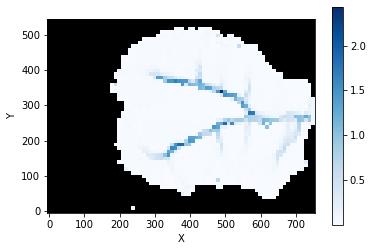

In [146]:
imshow_grid(gm, 'surface_water__depth', cmap='Blues')

Now let's get clever, and run a set of time slices:

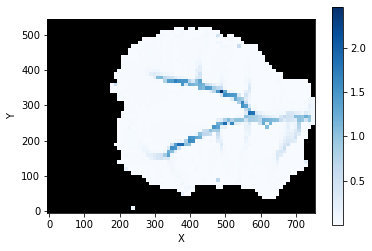

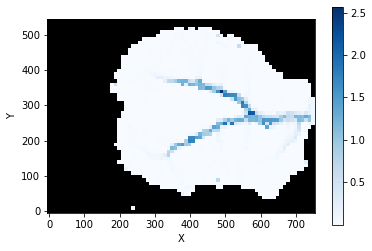

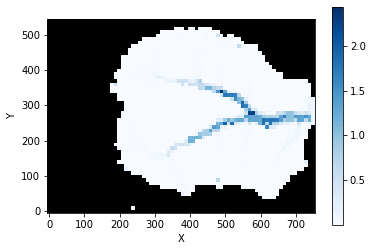

In [147]:
elapsed_time = 1.
for t in run_time_slices:
    while elapsed_time < t:
        # First, we calculate our time step.
        dt = of.calc_time_step()
        # Now, we can generate overland flow.
        of.overland_flow()
        # Increased elapsed time
        elapsed_time += dt
    figure(t)
    imshow_grid(gm, 'surface_water__depth', cmap='Blues')

### Click here for more <a href="https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html">Landlab tutorials</a>